In [13]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from wrf import getvar, interplevel, to_np, get_basemap, ll_to_xy,latlon_coords,latlon_coords, smooth2d,get_cartopy, cartopy_xlim, cartopy_ylim
import pandas as pd
from netCDF4 import Dataset
import netCDF4
import h5py as h5
import csv
from scipy import stats
import seaborn as sns
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units

In [14]:
file = Dataset('wrfout_d01_2017-01-07_18:00:00')

ter = getvar(file, 'ter')

In [15]:
ter = getvar(file, 'ter')
lat = getvar(file,'lat')
lon = getvar(file,'lon')

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

class FixPointNormalize(matplotlib.colors.Normalize):
    """ 
    Inspired by https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib
    Subclassing Normalize to obtain a colormap with a fixpoint 
    somewhere in the middle of the colormap.

    This may be useful for a `terrain` map, to set the "sea level" 
    to a color in the blue/turquise range. 
    """
    def __init__(self, vmin=None, vmax=None, sealevel=0, col_val = 0.21875, clip=False):
        # sealevel is the fix point of the colormap (in data units)
        self.sealevel = sealevel
        # col_val is the color value in the range [0,1] that should represent the sealevel.
        self.col_val = col_val
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.sealevel, self.vmax], [0, self.col_val, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# Combine the lower and upper range of the terrain colormap with a gap in the middle
# to let the coastline appear more prominently.
# inspired by https://stackoverflow.com/questions/31051488/combining-two-matplotlib-colormaps
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 56))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 200))
# combine them and build a new colormap
colors = np.vstack((colors_undersea, colors_land))
cut_terrain_map = matplotlib.colors.LinearSegmentedColormap.from_list('cut_terrain', colors)

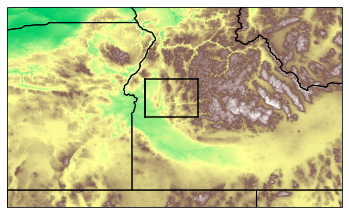

In [71]:
fig, ax = plt.subplots()
plt.contourf(lon,lat, ter)
ax = plt.axes(projection = crs.PlateCarree())
ax.set_extent([-120,-112,41.6,46.38], crs = crs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
plt.contourf(lon,lat, ter)
ax.add_feature(cfeature.STATES)
norm = FixPointNormalize(sealevel=0, vmax=3400)
plt.contourf(lon,lat, ter,100, norm = norm,cmap=plt.cm.terrain)
# specify map extent here
#lonmin, lonmax = -116.70062, -115.44735
#latmin, latmax = 43.756786, 44.655064
x1 = [-116.70062, -115.44735]
y1 = [43.756786,43.756786]
plt.plot(x1,y1, color = 'black')
x1 = [-116.70062, -115.44735]
y1 = [44.655064,44.655064]
plt.plot(x1,y1, color = 'black')
x1 = [-116.70062, -116.70062]
y1 = [43.756786,44.655064]
plt.plot(x1,y1, color = 'black')
plt.plot(x1,y1, color = 'black')
x1 = [-115.44735, -115.44735]
y1 = [43.756786,44.655064]
plt.plot(x1,y1, color = 'black')
plt.savefig("DOMAIN.png", dpi = 300)